# Python data analysis
## First of all we need to upload dataframes with quarterly tables that we created in "Data processing" notebook.

In [321]:
import numpy as np
import pandas as pd
import glob
import os

In [322]:
path='d:\moje_dokumenty\Desktop\IES\semester 11\Python\project\First_q\ '  # make your own path to the data
csv_path=path+"*.csv"
files=glob.glob(csv_path)      # gives you list of csv files in the directory
files=sorted(files)            # just to make sure that the order is correct

In [323]:
Q1= [pd.read_csv(file) for file in files]
len(Q1)

1820

In [324]:
path2='d:\moje_dokumenty\Desktop\IES\semester 11\Python\project\second_q\ '  # make your own path to the data
csv_path2=path2+"*.csv"
files2=glob.glob(csv_path2)      # gives you list of csv files in the directory
files2=sorted(files2)            # just to make sure that the order is correct

In [325]:
Q2= [pd.read_csv(file) for file in files2]
len(Q2)

1820

In [326]:
path3='d:\moje_dokumenty\Desktop\IES\semester 11\Python\project\Third_q\ '  # make your own path to the data
csv_path3=path3+"*.csv"
files3=glob.glob(csv_path3)      # gives you list of csv files in the directory
files3=sorted(files3)            # just to make sure that the order is correct

In [327]:
Q3= [pd.read_csv(file) for file in files3]
len(Q3)

1820

In [328]:
path4='d:\moje_dokumenty\Desktop\IES\semester 11\Python\project\Fourth_q\ '  # make your own path to the data
csv_path4=path4+"*.csv"
files4=glob.glob(csv_path4)      # gives you list of csv files in the directory
files4=sorted(files4)            # just to make sure that the order is correct

In [329]:
Q4= [pd.read_csv(file) for file in files4]
len(Q4)

1820

## Throughout this part of the project, we will be sorting our quarterly data into lists of four items.

In [330]:
Qs=[Q1,Q2,Q3,Q4]

In [331]:
''' Changing names of columns to english  '''
for q in Qs:
    for x in q:
        x.columns=['city', 'year', 'month', 'day', 'mean T', 'min T', 'max T', 'prec', 'humidity', 'wind']

In [332]:
''' Creating a column with the difference between max and min daily temperature '''
for q in Qs:
    for table in q:
        table["T diff"]=table["max T"]-table["min T"]

In [333]:
''' Assuming that missing values for reciprication means no rain  '''
for q in Qs:
    for x in q:
        x["prec"]=x["prec"].replace(np.NaN,0)

## Calculations of quarterly averages and variances. 
## We will take advantage of the fact that the data in the lists of quarterly tables are ordered by cities and years in this way: 
* ##  from 1st to 35th item are tables for city 1 (Bari), years 1985-2019
* ## 36th to 70th table are for city 2 (Bologna), etc.


In [334]:
''' For later reference, creating list of cities and years '''
cities=[Q1[35*i]["city"][0] for i in range(52)]
years=[Q1[i]["year"][0] for i in range(35)]
cities

['Bari',
 'Bologna',
 'Brindisi',
 'Catania',
 'Chieti',
 'Cremona',
 'Foggia',
 'Genova',
 'Grosseto',
 'Latina',
 'Lecco',
 'Lucca',
 'Matera',
 'Modena',
 'Novara',
 'Pescara',
 'Pisa',
 'Pordenone',
 'Ravenna',
 'Roma',
 'Savona',
 'Siracusa',
 'Torino',
 'Trieste',
 'Venezia',
 'Verona',
 'Bergamo',
 'Brescia',
 'Cagliari',
 'Catanzaro',
 'Cosenza',
 'Firenze',
 'Frosinone',
 'Gorizia',
 'Imperia',
 'Lecce',
 'Livorno',
 'Mantova',
 'Messina',
 'Napoli',
 'Palermo',
 'Piacenza',
 'Pistoia',
 'Prato',
 'Rimini',
 'Sassari',
 'Siena',
 'Taranto',
 'Trapani',
 'Udine',
 'Vercelli',
 'Viterbo']

In [335]:
'''   A simple function for calculations of quarterly averages of our variables (for each city and each year)   '''
def means(variable,Q_list=Qs):
    return [[np.mean(x[variable]) for x in q] for q in Q_list]

In [336]:
''' Calculation of quarterly averages of daily temperatures'''
meanT_means_Qs=means("mean T")

''' Calculation of quarterly averages of precipitations'''
prec_means_Qs=means("prec")

''' Calculation of quarterly averages of daily maximal wind'''
wind_means_Qs=means("wind")

''' Calculation of quarterly averages of daily temperature range'''
Tdiff_means_Qs=means("T diff")

''' Calculation of quarterly averages of humidity  '''
hum_means_Qs=means("humidity")

In [337]:
'''   A simple function for calculations of quarterly variances of our variables (for each city and each year)   '''
def varies(variable,Q_list=Qs):
    return [[np.var(x[variable]) for x in q] for q in Q_list]

In [338]:
''' Calculation of quarterly variance of daily temperatures  '''
meanT_var_Qs=varies("mean T")

''' Calculation of quarterly variance of precipitation  '''
prec_var_Qs=varies("prec")

''' Calculation of quarterly variance of daily maximal wind  '''
wind_var_Qs=varies("wind")

''' Calculation of quarterly variance of daily temperature range '''
Tdiff_var_Qs=varies("T diff")

''' Calculation of quarterly variance of humidity '''
hum_var_Qs=varies("humidity")

### Creating quarterly data and measures for the whole Italy, acumulated from the cities' data. 

In [339]:
''' Creating quarterly dataframes for the whole Italy ''' 
all_ITA_Qs=[[pd.concat(q[i::35]) for i in range(int(len(q)/52))] for q in Qs]

In [340]:
''' Calculation of quarterly averages for the whole Italy data, 
       we can apply our pre-defined functions again if we change Q_list argument '''
ITA_meanT_means_Qs=means("mean T",all_ITA_Qs)
ITA_wind_means_Qs=means("wind",all_ITA_Qs)
ITA_prec_means_Qs=means("prec",all_ITA_Qs)
ITA_Tdiff_means_Qs=means("T diff",all_ITA_Qs)
ITA_hum_means_Qs=means("humidity",all_ITA_Qs)

In [341]:
''' Calculation of quarterly variances for the whole Italy data, 
       we can apply our pre-defined functions again if we change Q_list argument '''
ITA_meanT_var_Qs=varies("mean T",all_ITA_Qs)
ITA_wind_var_Qs=varies("wind",all_ITA_Qs)
ITA_prec_var_Qs=varies("prec",all_ITA_Qs)
ITA_Tdiff_var_Qs=varies("T diff",all_ITA_Qs)
ITA_hum_var_Qs=varies("humidity",all_ITA_Qs)

## Creating time-series prepared to be plotted.

In [342]:
'''  A simple function for ordering our measures into plot-ready time series of all cities in Italy''' 
def t_series(variable_measure):
    return [[q[i::35] for i in range(35)] for q in variable_measure] 

In [343]:
'''  Plot-ready time series of cities' quarterly data measures; the n-th item of the resulting list is 
       plot-ready time series of a respective variable measure for the n-th quarter   ''' 
# averages
t_series_meanT_means_Qs=t_series(meanT_means_Qs) 
t_series_wind_means_Qs=t_series(wind_means_Qs) 
t_series_prec_means_Qs=t_series(prec_means_Qs) 
t_series_Tdiff_means_Qs=t_series(Tdiff_means_Qs) 
t_series_hum_means_Qs=t_series(hum_means_Qs) 

# variances
t_series_meanT_var_Qs=t_series(meanT_var_Qs) 
t_series_wind_var_Qs=t_series(wind_var_Qs) 
t_series_prec_var_Qs=t_series(prec_var_Qs) 
t_series_Tdiff_var_Qs=t_series(Tdiff_var_Qs) 
t_series_hum_var_Qs=t_series(hum_var_Qs) 

## We will be also interested in seeing de-meaned time series of the averages for the cities, which we create here:

In [344]:
'''  A simple function which will create ready-to-plot de-meaned time series  '''  
def demean(variable_measure):
    series=[[x[i*35:((i+1)*35)] for i in range(52)] for x in variable_measure]
    means=[[np.mean(city) for city in q] for q in series]
    demeaned=[np.array(t_series(variable_measure)[i])-np.array(means[i]) for i in range(4)]
    return demeaned

In [345]:
'''   Ready-to-plot de-meaned time series of averages '''
demeaned_t_series_meanT_means_Qs=demean(meanT_means_Qs)
demeaned_t_series_wind_means_Qs=demean(wind_means_Qs) 
demeaned_t_series_prec_means_Qs=demean(prec_means_Qs) 
demeaned_t_series_Tdiff_means_Qs=demean(Tdiff_means_Qs) 
demeaned_t_series_hum_means_Qs=demean(hum_means_Qs) 

## If we are interested in a particular city or set of cities, we can get any of the above-defined time series for our chosen cities.

In [346]:
''' We can get also a ready-to-plot time series for a particular set of cities; city_indeces must be a list of indexes
      corresponding to the "cities" - which is list of cities in our dataset '''
def city_t_series(t_series, city_indeces):
    return [[[x[i] for i in city_indeces]for x in q] for q in demeaned_t_series_meanT_means_Qs]

## For example Roma is 20th city in our dataset. Venice is 25th. We can get de-meaned time series of average temperatures in Roma and Venice:

In [347]:
print(cities.index("Roma"))
print(cities.index("Venezia"))

19
24


In [348]:
ROMA_Venice_demeaned_t_series_meanT_means_Qs=city_t_series(t_series_meanT_means_Qs, [19,24])

 ## We can now visualize our resulting time series.

In [349]:
import matplotlib.pyplot as plt

In [350]:
''' This function will return 4 plots with our time series - 1 for each quarter '''
def weather_plots(t_series, name, years=years, titles=["Q1","Q2","Q3","Q4"]):
    fig_1 = plt.figure(1, figsize=(20, 15))
    chart_1 = fig_1.add_subplot(221)
    chart_2 = fig_1.add_subplot(222)
    chart_3 = fig_1.add_subplot(223)
    chart_4 = fig_1.add_subplot(224)
    chart_1.plot(years,t_series[0])
    chart_2.plot(years,t_series[1])
    chart_3.plot(years,t_series[2])
    chart_4.plot(years,t_series[3])
    chart_1.set_title(titles[0])
    chart_2.set_title(titles[1])
    chart_3.set_title(titles[2])
    chart_4.set_title(titles[3])
    chart_1.set_xlabel('Years')
    chart_2.set_xlabel('Years')
    chart_3.set_xlabel('Years')
    chart_4.set_xlabel('Years')
    chart_1.set_ylabel(name)
    chart_2.set_ylabel(name)
    chart_3.set_ylabel(name)
    chart_4.set_ylabel(name)

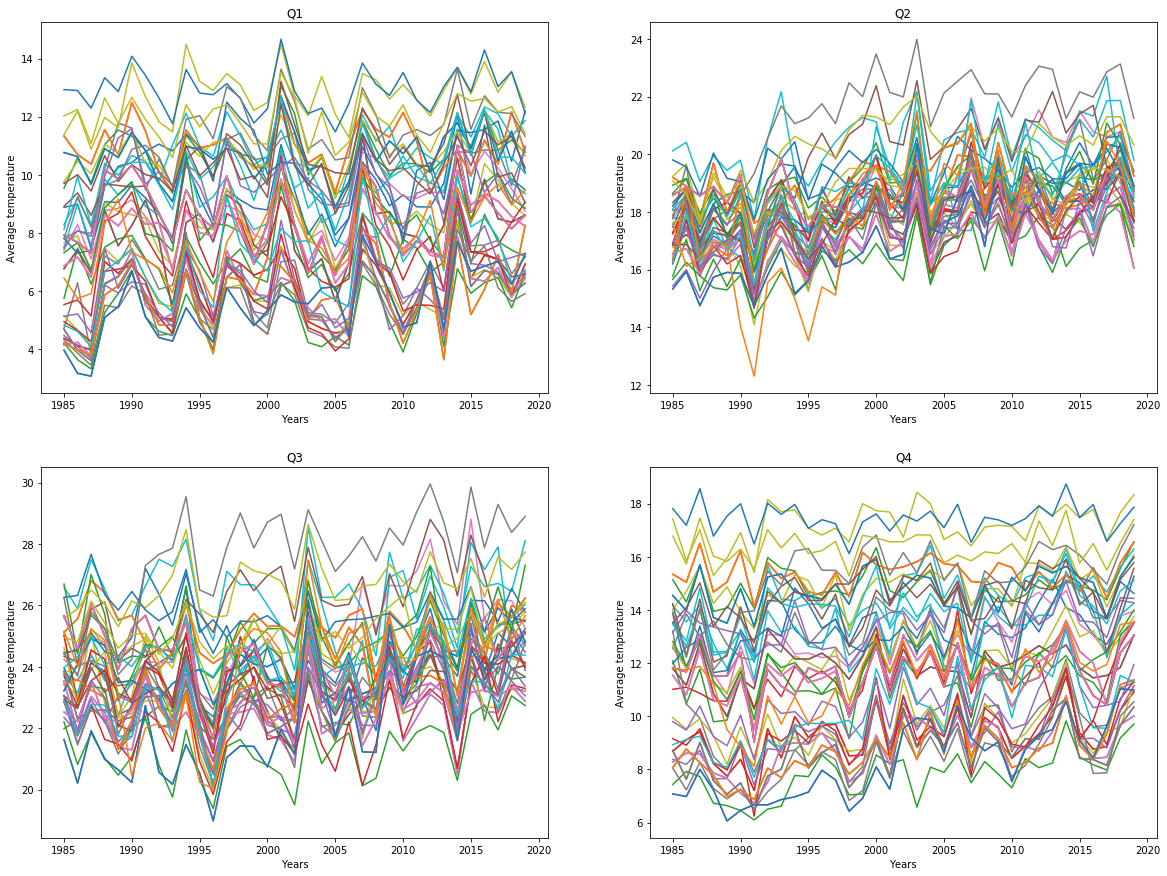

In [351]:
''' Evolution of average quarterly temperature across all 52 cities in our dataset '''
weather_plots(t_series_meanT_means_Qs, "Average temperature")

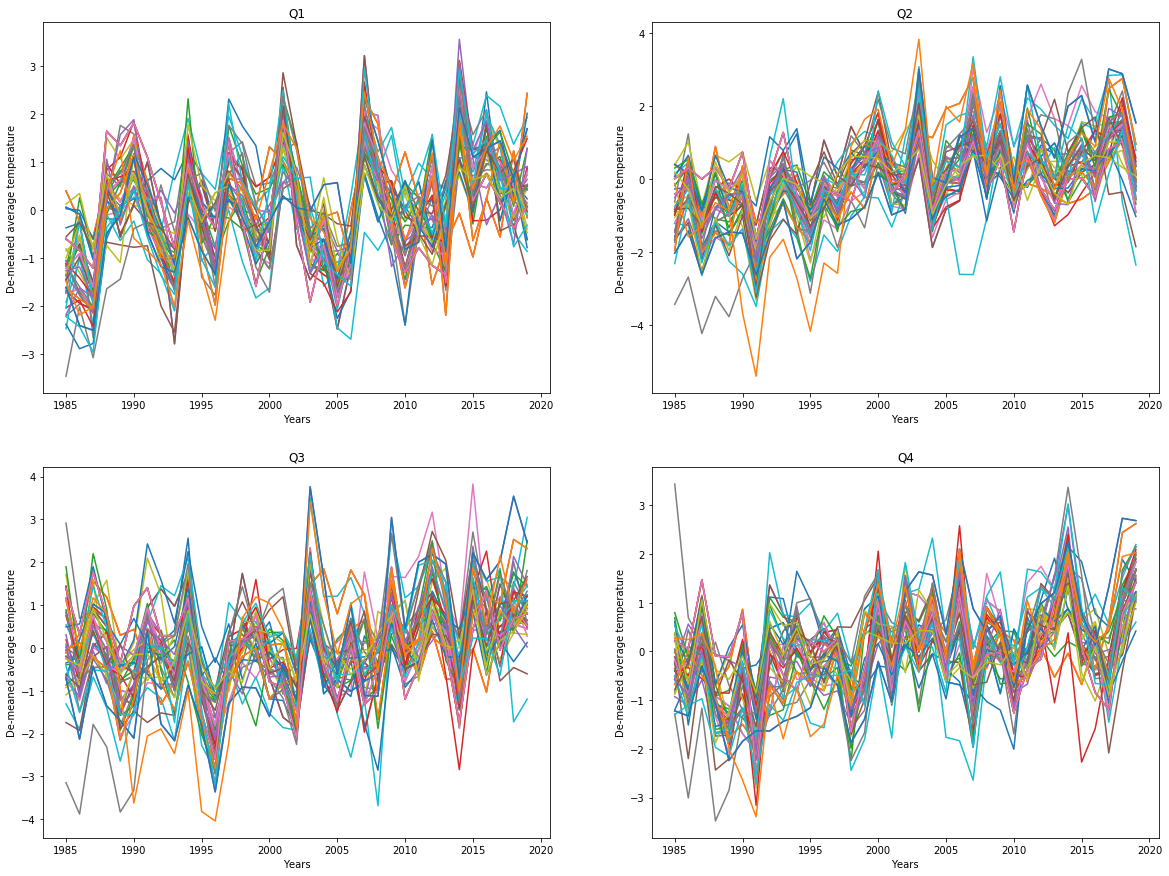

In [352]:
''' Now we can take a look at evolution of de-meaned average quarterly temperature across all 52 cities in our dataset '''
weather_plots(demeaned_t_series_meanT_means_Qs, "De-meaned average temperature")

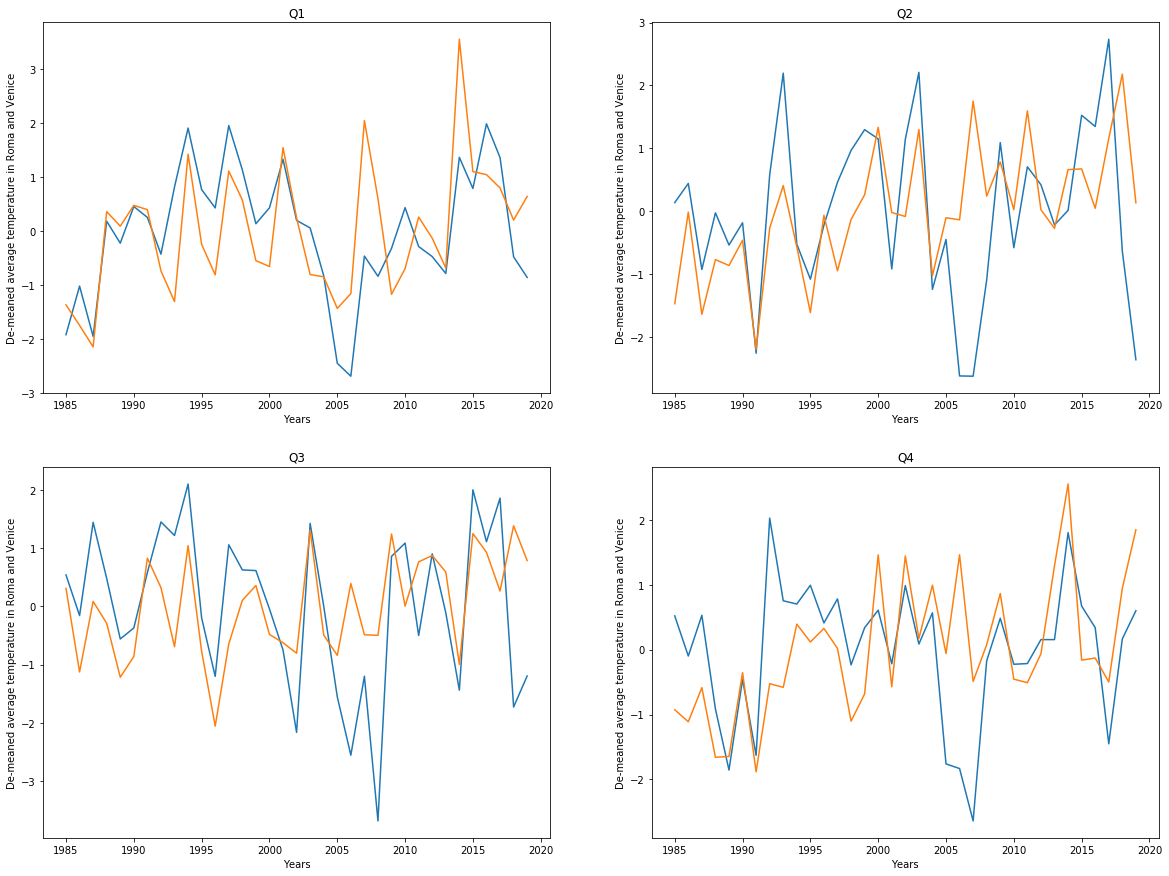

In [353]:
''' What about de-meaned average quarterly temperature in Roma and Venice? '''
weather_plots(ROMA_Venice_demeaned_t_series_meanT_means_Qs, "De-meaned average temperature in Roma and Venice")

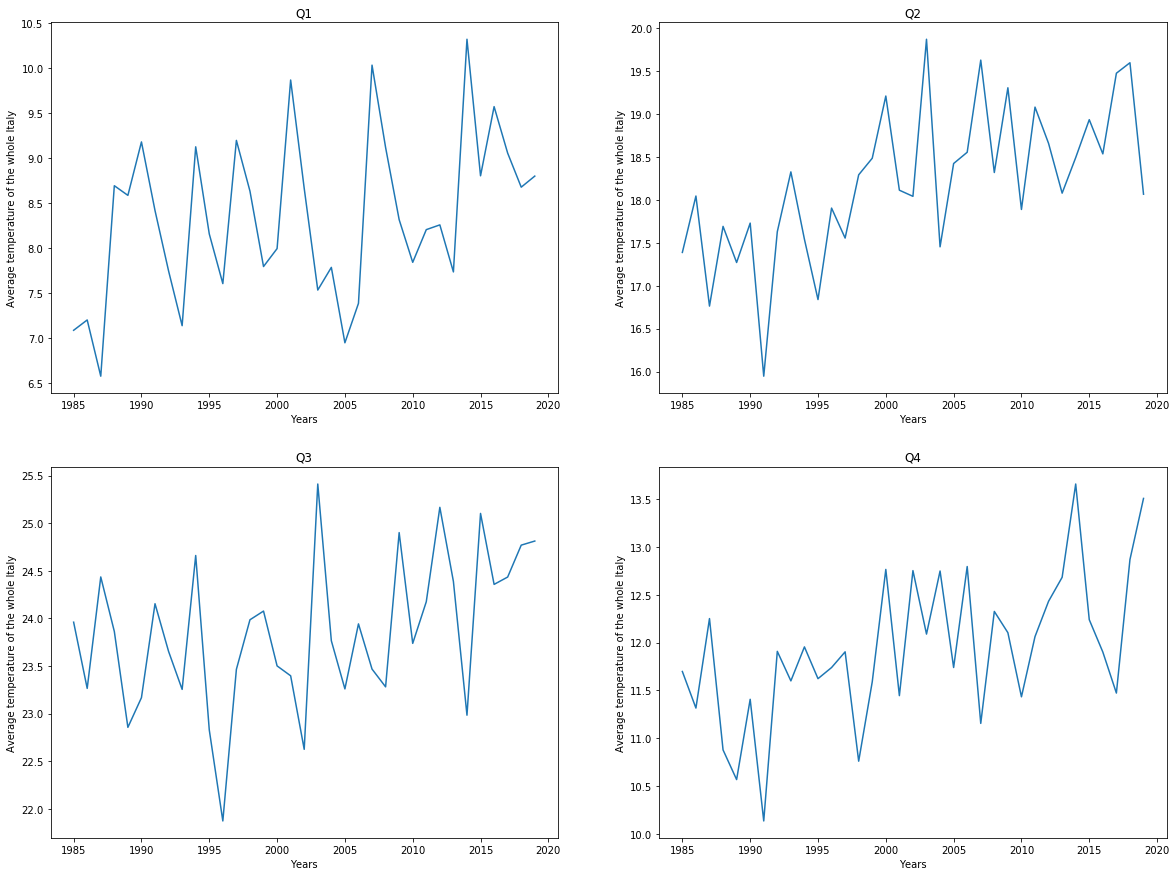

In [354]:
''' Here we can see time series of average quarterly temperatures for the Italy as a whole '''
weather_plots(ITA_meanT_means_Qs, "Average temperature of the whole Italy")